In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/AirPassengers.csv')

df['Month'] = pd.to_datetime(df['Month'])

In [2]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


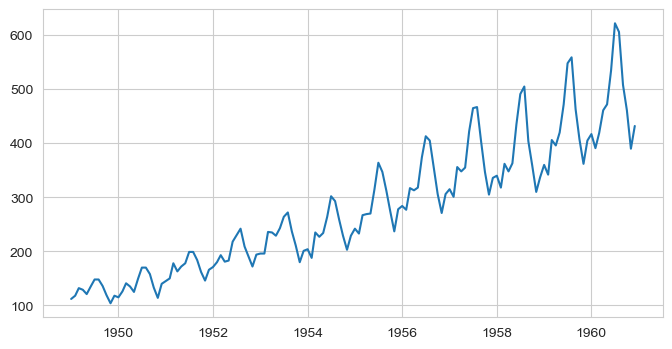

In [3]:
plt.figure(figsize=(8, 4))

plt.plot(df['Month'], df['Passengers'])

plt.show()

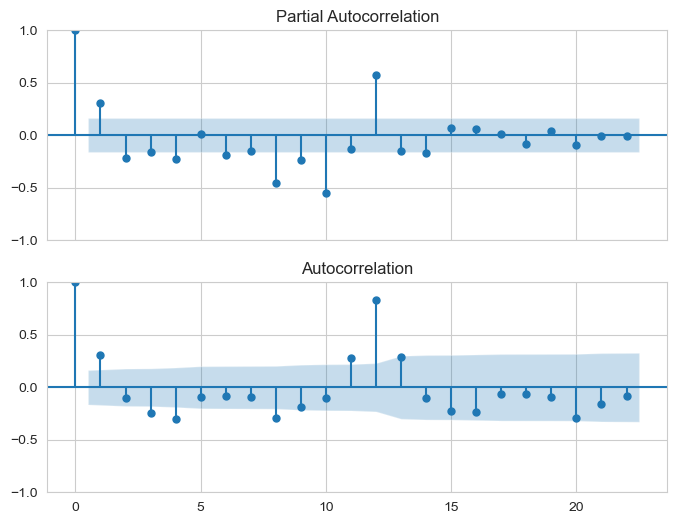

In [4]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fix, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

plot_pacf(df['Passengers'].diff().dropna(), ax=ax[0])
plot_acf(df['Passengers'].diff().dropna(), ax = ax[1])

plt.show()

In [58]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", round(dftest[1],6))
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if dftest[0] < dftest[4]["5%"]:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to Reject Ho - Time Series is Non-Stationary")

adf_test(df['Passengers'])

1. ADF :  0.8153688792060547
2. P-Value :  0.99188
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
Failed to Reject Ho - Time Series is Non-Stationary


In [75]:
arima = ARIMA(df['Passengers'], order=[2,1,1])
model_fit = arima.fit()

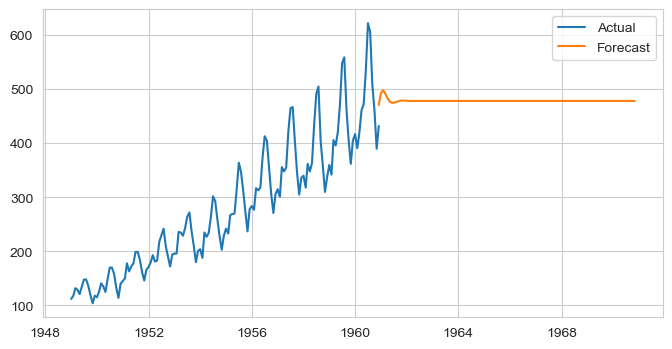

In [76]:
plt.figure(figsize=(8, 4))

date_range = pd.date_range(df['Month'].max(), periods=120, freq='MS')

plt.plot(df['Month'], df['Passengers'], label='Actual')
plt.plot(date_range, model_fit.forecast(steps=120), label='Forecast')

plt.legend()

plt.show()
